# Assignment 1

### we have to build a decision tree from scratch using various calclulations


## Part 4 (10 points)
Visualise training data on a 2-dimensional plot taking one fea-
ture (attribute) on one axis and other feature on another axis. Take two suitable
features to visualise decision tree boundary (Hint: use scatter plot with different
colors for each label)

#### Imporitng Libraries

In [32]:
import pandas as pd
import numpy
import random
import math
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
eps = numpy.finfo(float).eps
from copy import deepcopy
import matplotlib.pyplot as plt

In [33]:
def get_unique_values(data,col):
    return list(data[col].unique())

In [34]:
def entropy(data, labelcol):

    dic = dict(data[labelcol].value_counts())
    entropy = 0.0
    for label in dic.keys():
        entropy = entropy + (-(((1.0)*dic[label])/(len(data) + eps) * numpy.log2(((1.0)*dic[label])/(len(data) + eps )) ) ) 
        #print(entropy)
    return entropy
    

## Information Gain
>- information gain is reduction in the entropy if we use a feature ( attribute ) as an decision boundary.
>- It calculates wieghted entropy for the unique values of the attribute and then subtracts it from the current entropy of the system.

In [35]:
def infogain(data, attr,labelcol):
    uniq = get_unique_values(data,attr)
    wt_entropy = 0.0
    for vals in uniq:
        selected_data = data.loc[data[attr] == vals]
        wieght = (1.0*len(selected_data))/(len(data) + eps )
        wt_entropy += wieght*entropy(selected_data,labelcol)
        #print(wt_entropy)
    return entropy(data, labelcol) - wt_entropy

#### Reading data from CSV and it's analysis

In [36]:
data = pd.read_csv('input_data/train.csv')

In [59]:
list(data)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [58]:
gains = {}
for i in range(len(list(data))):
    if i == 6 :
        continue
    else:
        gains[infogain(data,list(data)[i],'left')] = list(data)[i]
        
sorted(gains)
attr1 = list(gains.values())[len(gains)-1]
attr2 = list(gains.values())[len(gains)-2]
print("attr  with max gain : ")
print(attr1)
print(attr2)
        

attr  with max gain : 
number_project
sales


In [21]:
data["salary"] = data["salary"].astype('category')
data["salary"] = data["salary"].cat.codes
data["sales"] = data["sales"].astype('category')
data["sales"] = data["sales"].cat.codes

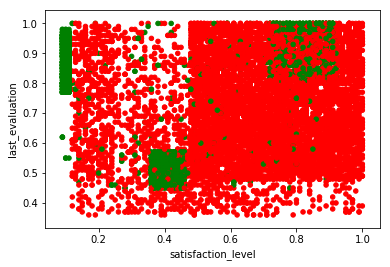

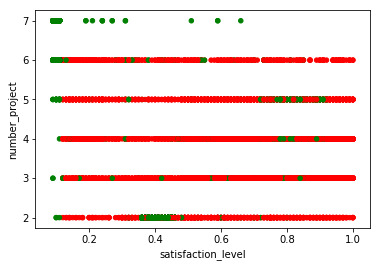

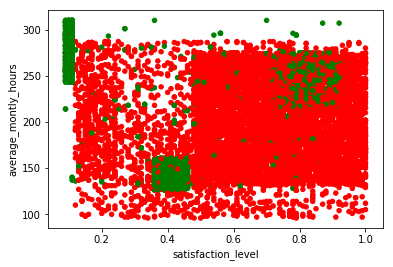

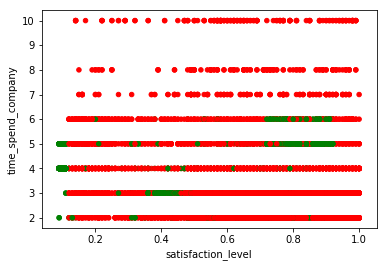

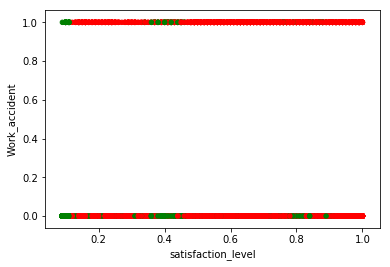

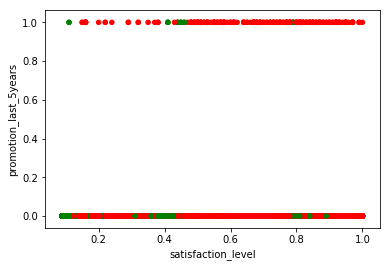

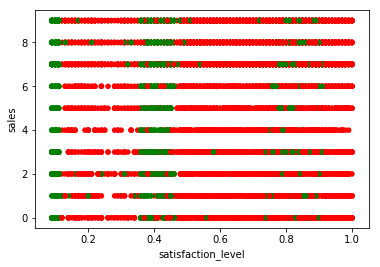

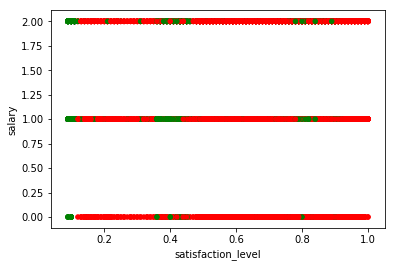

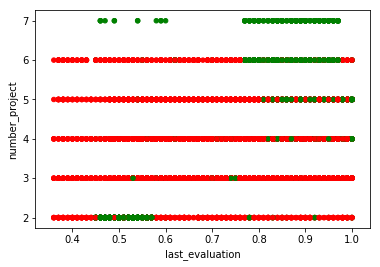

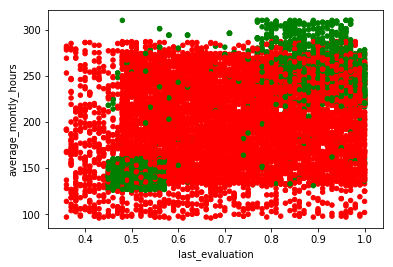

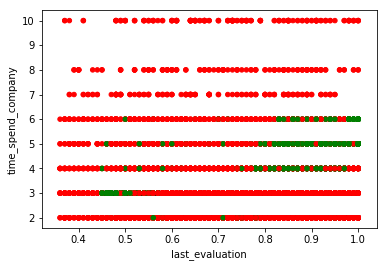

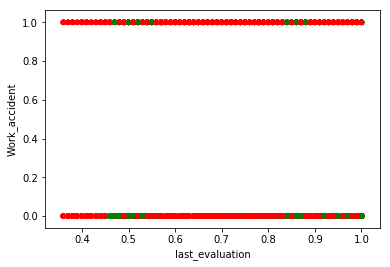

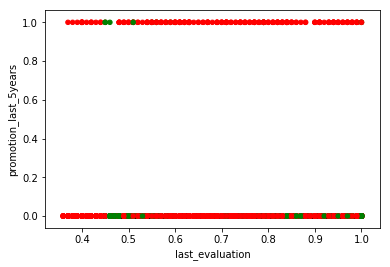

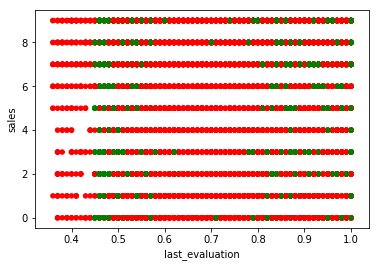

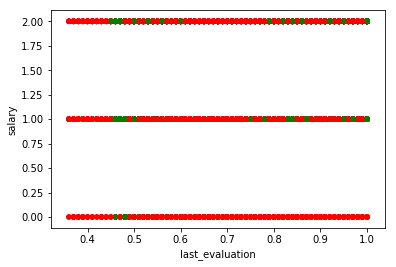

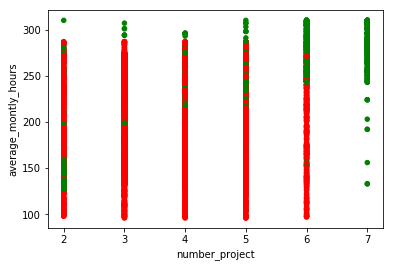

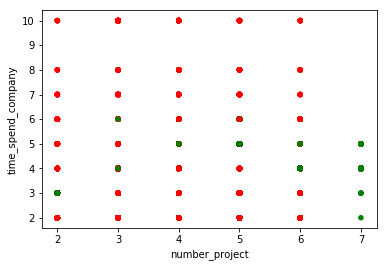

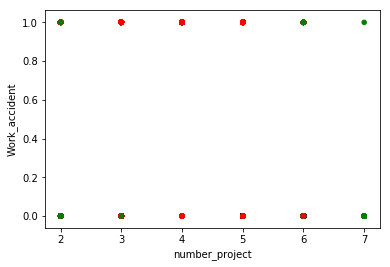

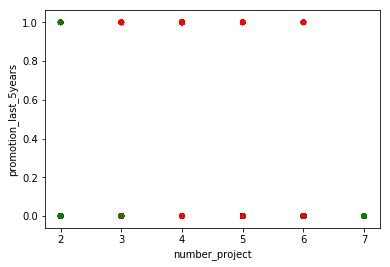

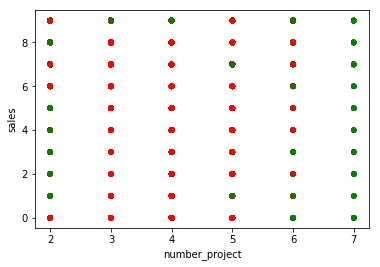

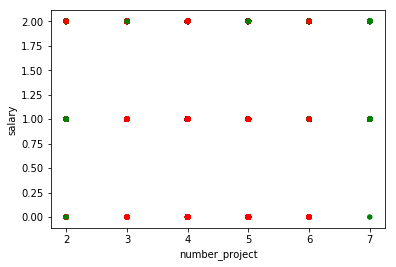

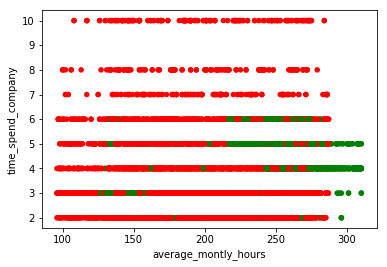

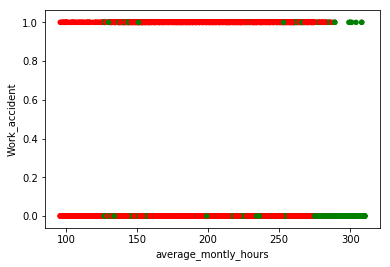

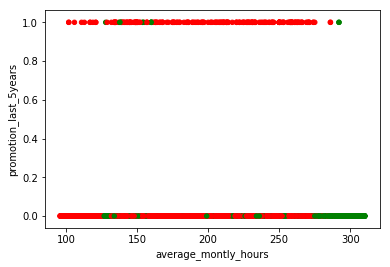

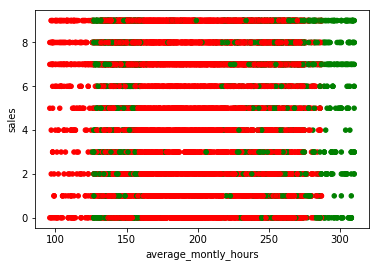

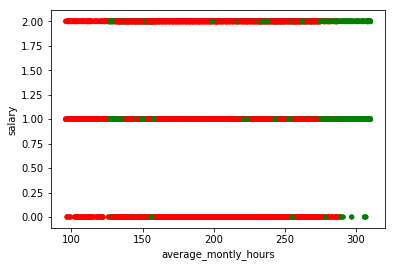

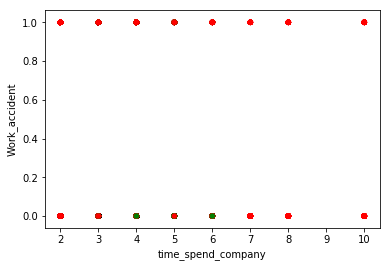

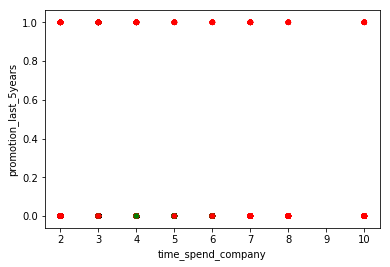

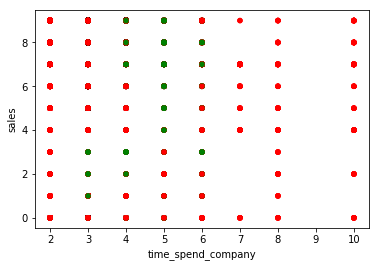

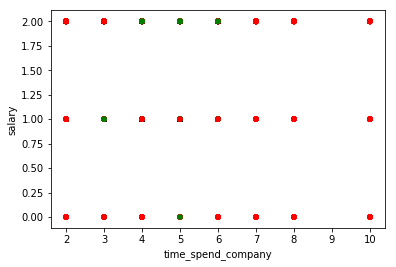

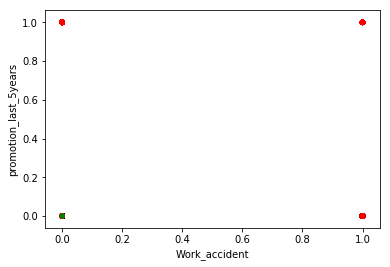

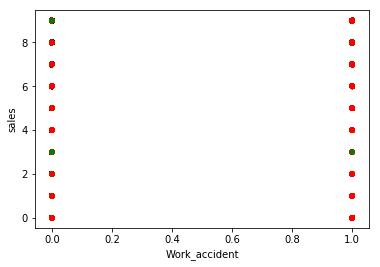

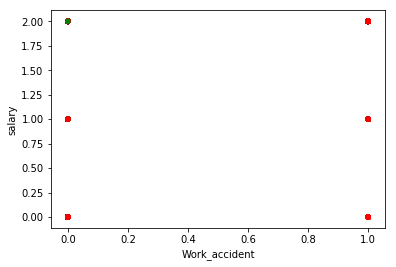

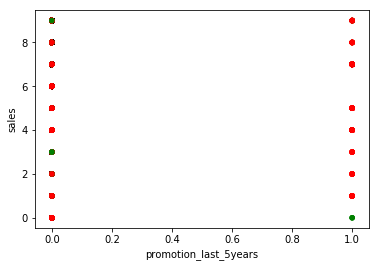

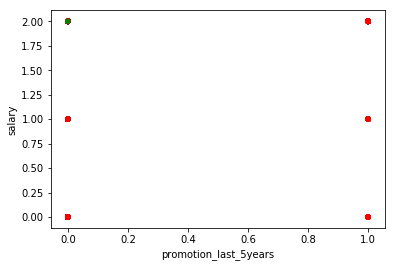

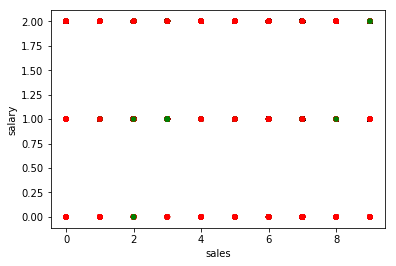

In [20]:
a = list(data)
for i in range(0,len(a)):
    for j in range(i+1,len(a)):
        if i == 6  or j == 6:
            continue
        colors = numpy.where(data["left"]==1,'g','r')
#         fig, ax = plt.subplots()
#         plt.xlabel(a[i])
#         plt.ylabel(a[j])
#         ax.scatter(data[a[i]],data[a[j]],c=colors)
        data.plot.scatter(x=i,y=j,c=colors)
        plt.show()


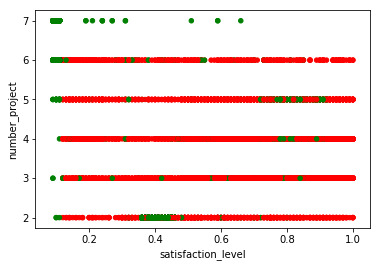

In [60]:
colors = numpy.where(data["left"]==1,'g','r')
data.plot.scatter(x=0,y=2,c=colors)